# Testing Variables Distribution Applying 'Logarithms'

## ** Notebook Content **

1. Introduction


2. Data Preprocessing


3. Variables Distribution Analysis


4. Checking the results in the Logistics Regression Model

## 1. Introduction

The goal of this notebook is to try to improve the performance of the initial model created in the *House Prices Prediction* project, which is composed only of numerical variables.

To get it, we are going to analyze the distribution of the numerical variables an apply logaritm functiosn in those variables that follow a distribution similar to the "gaussian distribution". Then, we will fit the Logistic Regression model and check if the score of the model has improved after applying the logarithmic functions.

## 2 Data Preprocessing

### 2.1 Importing the requiered packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### 2.2 Loading the dataset

In [2]:
#loading the training set
df_train_clean = pd.read_csv('df_train_clean.csv')
df_train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [3]:
df_train_clean.shape

(1324, 75)

### 2.3 Preparing the data

In [4]:
#remove variables with low correlation
df_train_clean.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath'], axis = 1, inplace = True)

In [5]:
#check the shape of the dataframe after removing the variables with low correlation
df_train_clean.shape

(1324, 65)

In [6]:
#Getting the Dependent and Independent variables
X_train = df_train_clean.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train_clean.iloc[:, 64] #all lines, only the last column

In [7]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1324, 64), (1324,))

In [8]:
##Create dtype dataframes
#create a dataframe with only categorical variables
df_object = X_train.select_dtypes(include=[object])
#create a dataframe with only numerical variables
df_number = X_train.select_dtypes(include=[np.number])

In [9]:
df_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [10]:
df_number.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,1.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,0.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,1.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,1.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,1.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0



## 3 Variables Distribution Analysis

Before fitting the Logistic Regression in our model, we have to check the distribution of the variables and try o correct those that do not follow a "normal" distribution in order to improve the performance of our model. To get it, we will apply *logarithmic functions* to correct the distribution.

__1) LotFrontage__

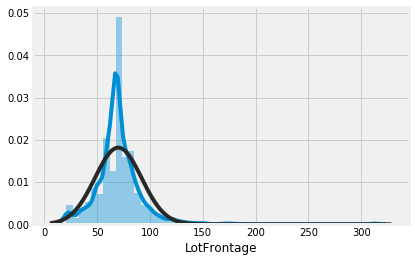

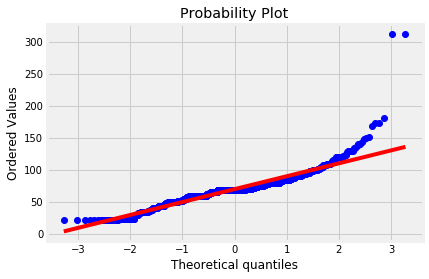

In [11]:
sns.distplot(df_number['LotFrontage'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['LotFrontage'], plot=plt)

In [12]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['LotFrontage'].skew())
print("Kurtosis: %f" % df_number['LotFrontage'].kurt())

Skewness: 2.575570
Kurtosis: 23.937258


In [13]:
#It looks like the variable LotFrontage does not have a normal distribution
#Apply logaritm functions to solve the problem
df_number['LotFrontage']= np.log(df_number['LotFrontage'])

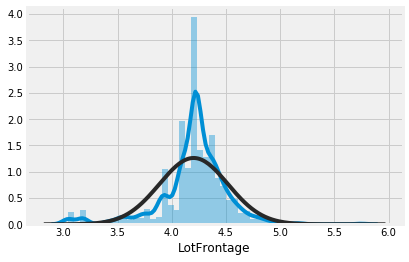

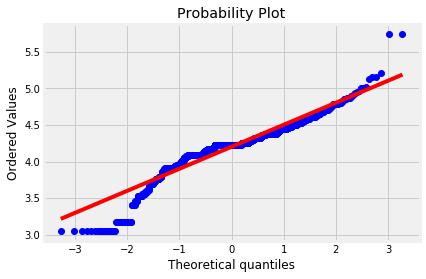

In [14]:
#Histogram and probability plot AFTER applying logarithmic functions
sns.distplot(df_number['LotFrontage'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['LotFrontage'], plot=plt)

In [15]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['LotFrontage'].skew())
print("Kurtosis: %f" % df_number['LotFrontage'].kurt())

Skewness: -0.874530
Kurtosis: 3.634186


__2) LotArea__

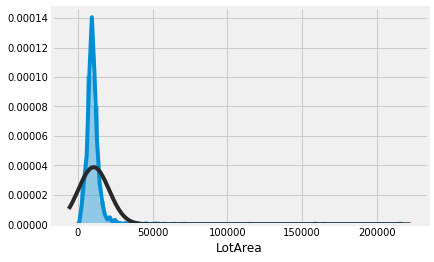

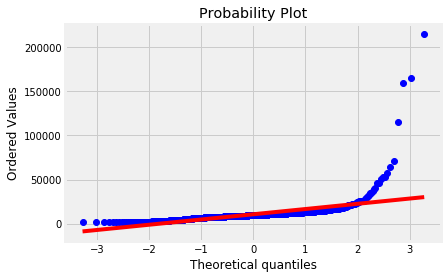

In [16]:
sns.distplot(df_number['LotArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['LotArea'], plot=plt)

In [17]:
#Measures of dispersion =>> Skewness and Kurtosis

print("Skewness: %f" % df_number['LotArea'].skew())
print("Kurtosis: %f" % df_number['LotArea'].kurt())

Skewness: 12.207886
Kurtosis: 198.115289


In [18]:
#It looks like the variable LotArea does not have a normal distribution
#Apply logaritm functions to solve the problem
df_number['LotArea']= np.log(df_number['LotArea'])

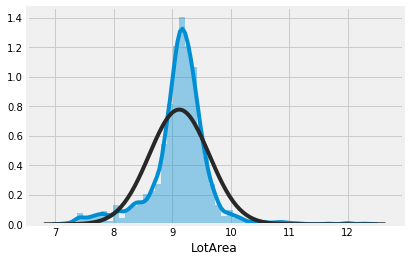

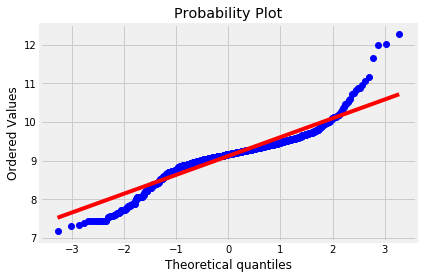

In [19]:
#Histogram and probability plot AFTER applying logarithmic functions
sns.distplot(df_number['LotArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['LotArea'], plot=plt)

In [20]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['LotArea'].skew())
print("Kurtosis: %f" % df_number['LotArea'].kurt())

Skewness: -0.092506
Kurtosis: 5.002727


__3) OverallQual__

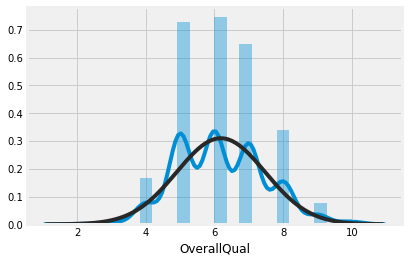

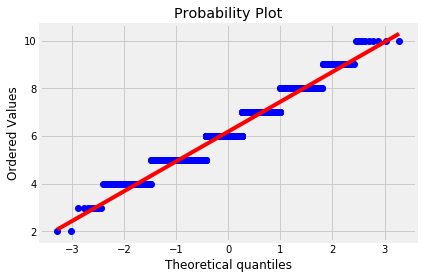

In [21]:
sns.distplot(df_number['OverallQual'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['OverallQual'], plot=plt)

In [22]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['OverallQual'].skew())
print("Kurtosis: %f" % df_number['OverallQual'].kurt())

Skewness: 0.243971
Kurtosis: -0.154898


__Important Note:__ We will not apply logaritm functions in the *OverallQual* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__4) OverallCond__

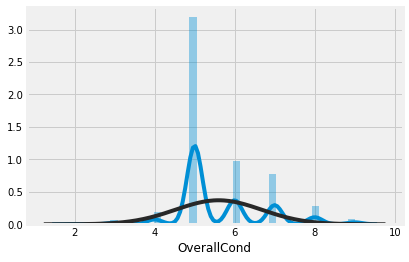

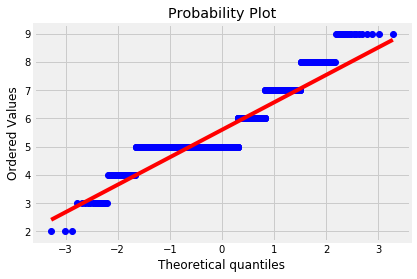

In [23]:
sns.distplot(df_number['OverallCond'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['OverallCond'], plot=plt)

In [24]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['OverallCond'].skew())
print("Kurtosis: %f" % df_number['OverallCond'].kurt())

Skewness: 0.877469
Kurtosis: 0.981668


__Important Note:__ We will not apply logaritm functions in the *OverallCond* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__5) YearBuilt__

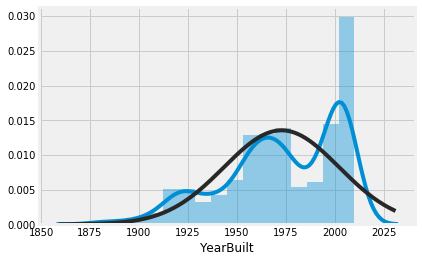

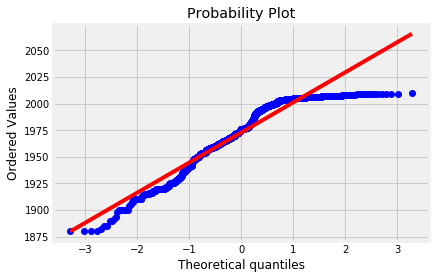

In [25]:
sns.distplot(df_number['YearBuilt'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['YearBuilt'], plot=plt)

In [26]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['YearBuilt'].skew())
print("Kurtosis: %f" % df_number['YearBuilt'].kurt())

Skewness: -0.663494
Kurtosis: -0.355138


__Important Note:__ We will not apply logaritm functions in the *YearBuilt* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__6) YearRemodAdd__

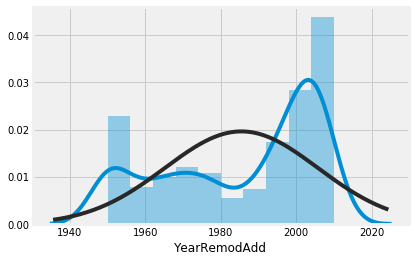

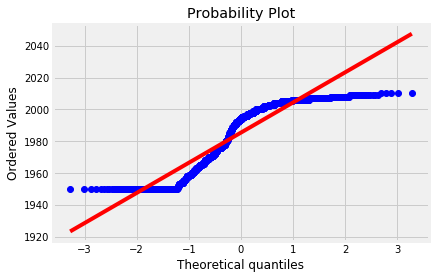

In [27]:
sns.distplot(df_number['YearRemodAdd'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['YearRemodAdd'], plot=plt)

In [28]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['YearRemodAdd'].skew())
print("Kurtosis: %f" % df_number['YearRemodAdd'].kurt())

Skewness: -0.549744
Kurtosis: -1.204408


__Important Note:__ We will not apply logaritm functions in the *YearRemodAdd* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__7) MasVnrArea__

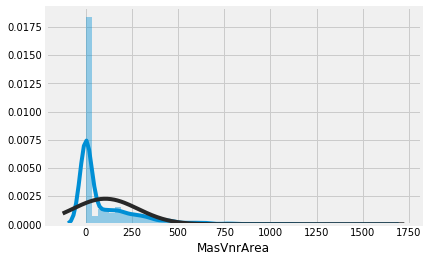

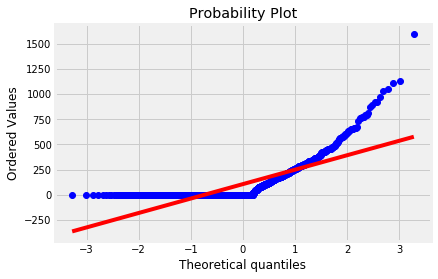

In [29]:
sns.distplot(df_number['MasVnrArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['MasVnrArea'], plot=plt)

In [30]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['MasVnrArea'].skew())
print("Kurtosis: %f" % df_number['MasVnrArea'].kurt())

Skewness: 2.499518
Kurtosis: 9.066906


__Important Note:__ We will not apply logaritm functions in the *MasVnrArea* variable in order to avoid infinit values! 

__8) BsmtFinSF1__

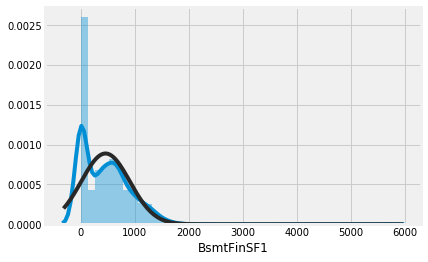

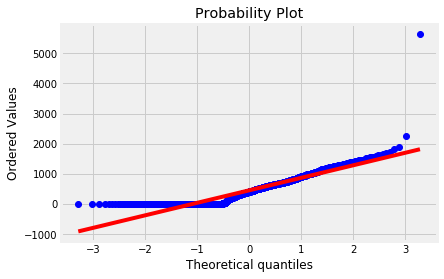

In [31]:
sns.distplot(df_number['BsmtFinSF1'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['BsmtFinSF1'], plot=plt)

In [32]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['BsmtFinSF1'].skew())
print("Kurtosis: %f" % df_number['BsmtFinSF1'].kurt())

Skewness: 1.722007
Kurtosis: 12.767226


__Important Note:__ We will not apply logaritm functions in the *BsmtFinSF1* variable in order to avoid infinit values!! 

__9) BsmtUnfSF__

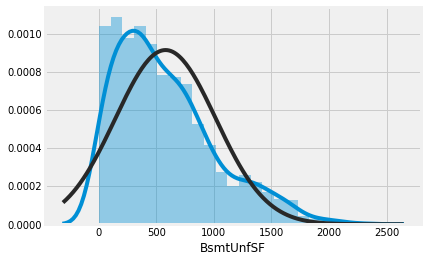

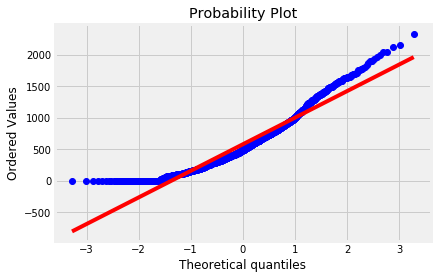

In [33]:
sns.distplot(df_number['BsmtUnfSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['BsmtUnfSF'], plot=plt)

In [34]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['BsmtUnfSF'].skew())
print("Kurtosis: %f" % df_number['BsmtUnfSF'].kurt())

Skewness: 0.929833
Kurtosis: 0.486989


__Important Note:__ We will not apply logaritm functions in the *BsmtUnfSF* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer".

__10) TotalBsmtSF__

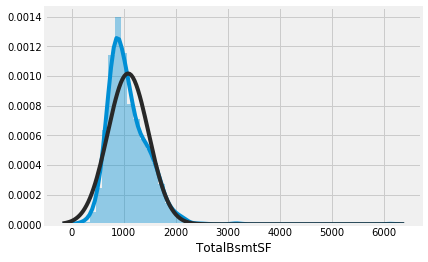

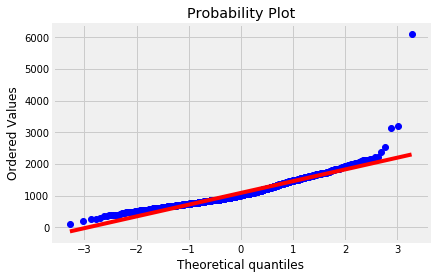

In [35]:
sns.distplot(df_number['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['TotalBsmtSF'], plot=plt)

In [36]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_number['TotalBsmtSF'].kurt())

Skewness: 2.269755
Kurtosis: 20.799873


In [37]:
#It looks like the variable TotalBsmtSF does not have a normal distribution
#Apply logaritm functions to solve the problem
df_number['TotalBsmtSF']= np.log(df_number['TotalBsmtSF'])

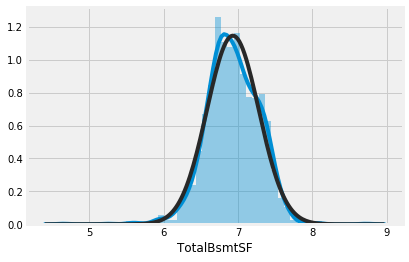

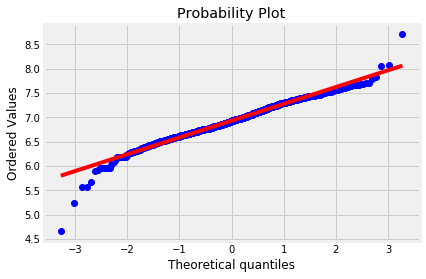

In [38]:
#Histogram and probability plot AFTER applying logarithmic functions
sns.distplot(df_number['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['TotalBsmtSF'], plot=plt)

In [39]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_number['TotalBsmtSF'].kurt())

Skewness: -0.326295
Kurtosis: 2.164957


__11) 1stFlrSF__

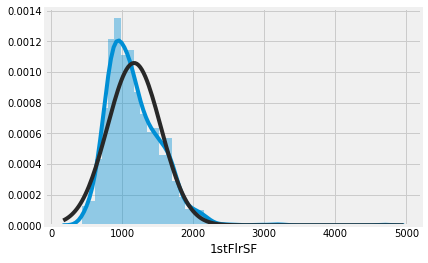

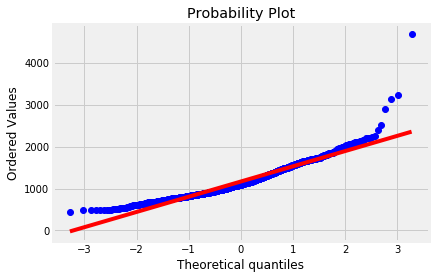

In [40]:
sns.distplot(df_number['1stFlrSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['1stFlrSF'], plot=plt)

In [41]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['1stFlrSF'].skew())
print("Kurtosis: %f" % df_number['1stFlrSF'].kurt())

Skewness: 1.407566
Kurtosis: 6.688619


In [42]:
#It looks like the variable 1stFlrSF does not have a normal distribution
#Apply logaritm functions to solve the problem
df_number['1stFlrSF']= np.log(df_number['1stFlrSF'])

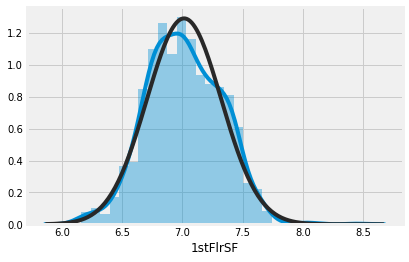

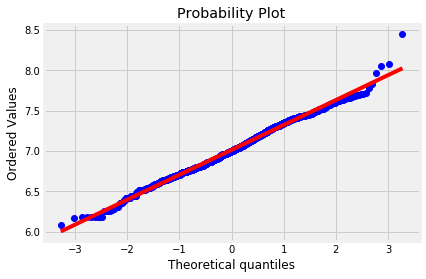

In [43]:
#Histogram and probability plot AFTER applying logarithmic functions
sns.distplot(df_number['1stFlrSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['1stFlrSF'], plot=plt)

In [44]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['1stFlrSF'].skew())
print("Kurtosis: %f" % df_number['1stFlrSF'].kurt())

Skewness: 0.078239
Kurtosis: 0.078251


__12) 2ndFlrSF__

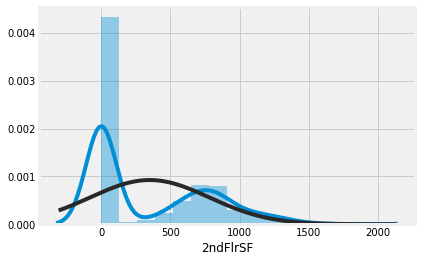

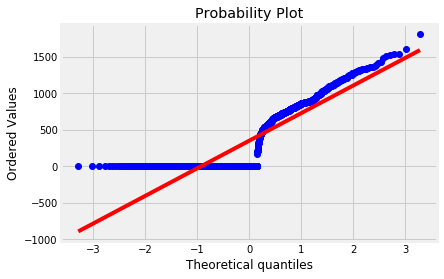

In [45]:
sns.distplot(df_number['2ndFlrSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['2ndFlrSF'], plot=plt)

In [46]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['2ndFlrSF'].skew())
print("Kurtosis: %f" % df_number['2ndFlrSF'].kurt())

Skewness: 0.717600
Kurtosis: -0.867904


__Important Note:__ We will not apply logaritm functions in the *2ndFlrSF* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__13) GrLivArea__

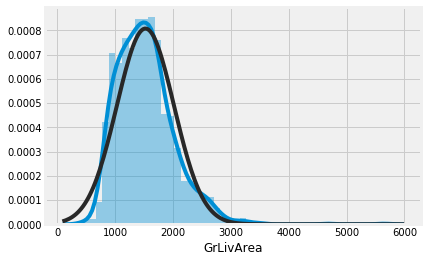

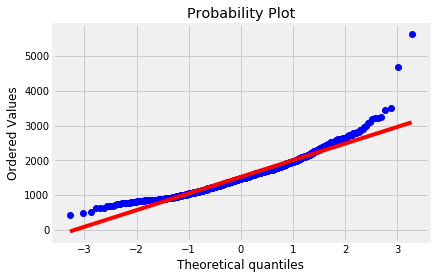

In [47]:
sns.distplot(df_number['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GrLivArea'], plot=plt)

In [48]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GrLivArea'].skew())
print("Kurtosis: %f" % df_number['GrLivArea'].kurt())

Skewness: 1.264037
Kurtosis: 5.007076


In [49]:
df_number['GrLivArea']= np.log(df_number['GrLivArea'])

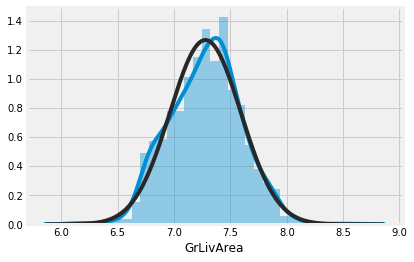

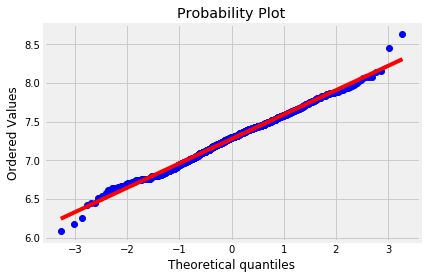

In [50]:
sns.distplot(df_number['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GrLivArea'], plot=plt)

In [51]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GrLivArea'].skew())
print("Kurtosis: %f" % df_number['GrLivArea'].kurt())

Skewness: -0.015262
Kurtosis: 0.118528


__14) BedroomAbvGr__

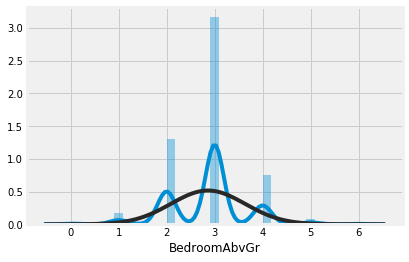

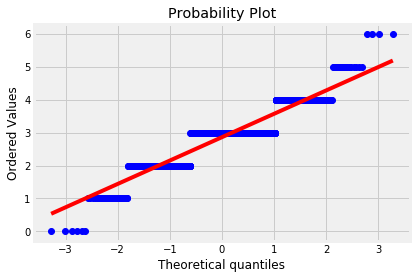

In [52]:
sns.distplot(df_number['BedroomAbvGr'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['BedroomAbvGr'], plot=plt)

In [53]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['BedroomAbvGr'].skew())
print("Kurtosis: %f" % df_number['BedroomAbvGr'].kurt())

Skewness: -0.050656
Kurtosis: 1.508614


__Important Note:__ We will not apply logaritm functions in the *BedroomAbvGr* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__15) KitchenAbvGr__

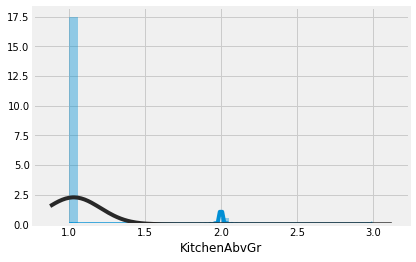

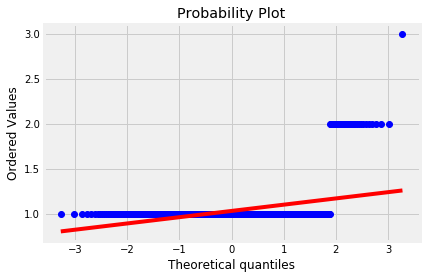

In [54]:
sns.distplot(df_number['KitchenAbvGr'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['KitchenAbvGr'], plot=plt)

In [55]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['KitchenAbvGr'].skew())
print("Kurtosis: %f" % df_number['KitchenAbvGr'].kurt())

Skewness: 5.909847
Kurtosis: 35.864642


__Important Note:__ We will not apply logaritm functions in the *KitchenAbvGr* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__16) Fireplaces__

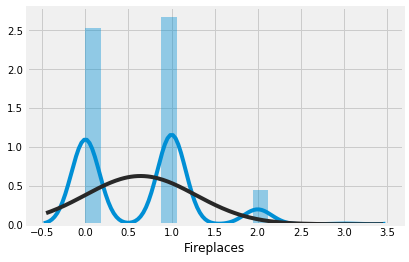

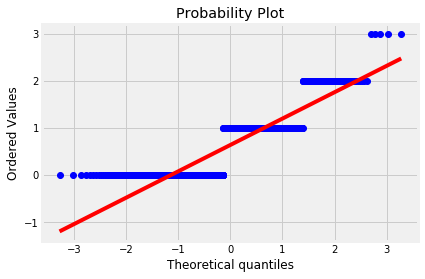

In [56]:
sns.distplot(df_number['Fireplaces'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['Fireplaces'], plot=plt)

In [57]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['Fireplaces'].skew())
print("Kurtosis: %f" % df_number['Fireplaces'].kurt())

Skewness: 0.581189
Kurtosis: -0.210407


__Important Note:__ We will not apply logaritm functions in the *Fireplaces* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__17) GarageYrBlt__

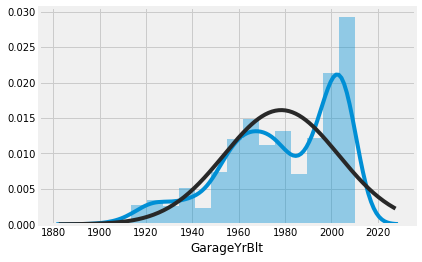

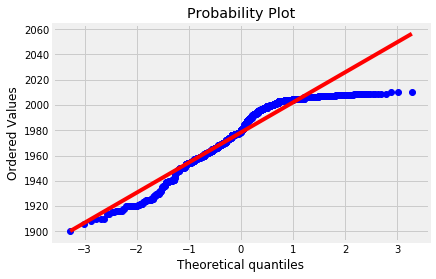

In [58]:
sns.distplot(df_number['GarageYrBlt'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GarageYrBlt'], plot=plt)

In [59]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GarageYrBlt'].skew())
print("Kurtosis: %f" % df_number['GarageYrBlt'].kurt())

Skewness: -0.657958
Kurtosis: -0.403337


__Important Note:__ We will not apply logaritm functions in the *GarageYrBlt* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__18) GarageCars__

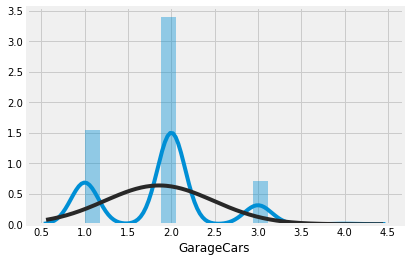

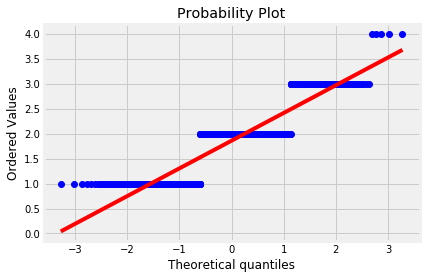

In [60]:
sns.distplot(df_number['GarageCars'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GarageCars'], plot=plt)

In [61]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GarageCars'].skew())
print("Kurtosis: %f" % df_number['GarageCars'].kurt())

Skewness: 0.205200
Kurtosis: -0.147589


__Important Note:__ We will not apply logaritm functions in the *GarageCars* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__19) GarageArea__

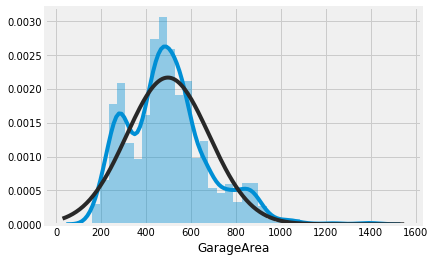

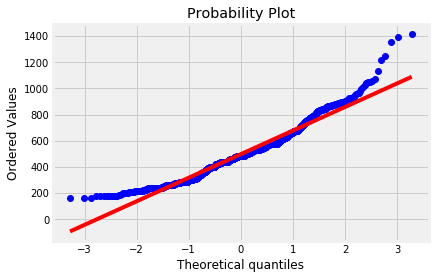

In [62]:
sns.distplot(df_number['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GarageArea'], plot=plt)

In [63]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GarageArea'].skew())
print("Kurtosis: %f" % df_number['GarageArea'].kurt())

Skewness: 0.816269
Kurtosis: 1.287916


In [64]:
df_number['GarageArea']= np.log(df_number['GarageArea'])

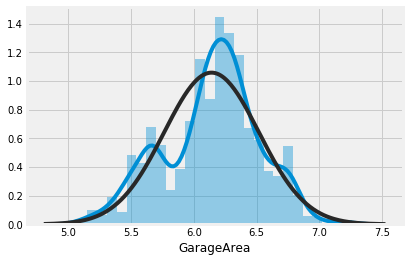

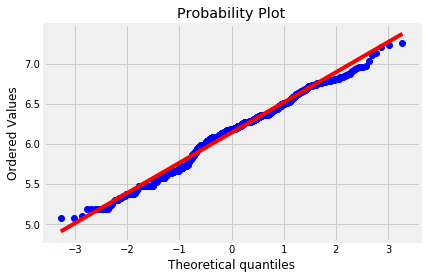

In [65]:
sns.distplot(df_number['GarageArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['GarageArea'], plot=plt)

In [66]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['GarageArea'].skew())
print("Kurtosis: %f" % df_number['GarageArea'].kurt())

Skewness: -0.259541
Kurtosis: -0.216841


__20) WoodDeckSF__

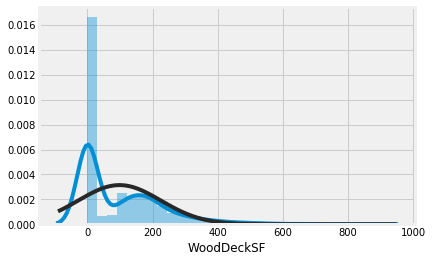

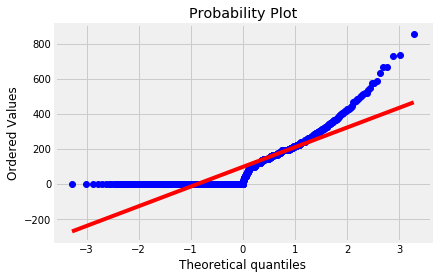

In [67]:
sns.distplot(df_number['WoodDeckSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['WoodDeckSF'], plot=plt)

In [68]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['WoodDeckSF'].skew())
print("Kurtosis: %f" % df_number['WoodDeckSF'].kurt())

Skewness: 1.498130
Kurtosis: 2.915952


__Important Note:__ We will not apply logaritm functions in the *WoodDeckSF* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__21) OpenPorchSF__

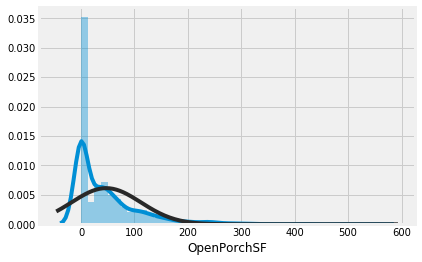

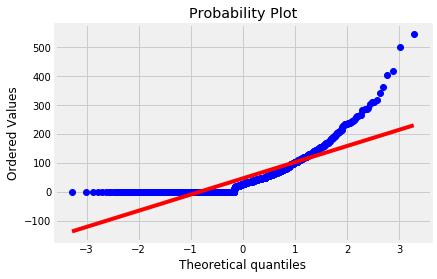

In [69]:
sns.distplot(df_number['OpenPorchSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['OpenPorchSF'], plot=plt)

In [70]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['OpenPorchSF'].skew())
print("Kurtosis: %f" % df_number['OpenPorchSF'].kurt())

Skewness: 2.280441
Kurtosis: 7.885653


__Important Note:__ We will not apply logaritm functions in the *OpenPorchSF* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__22) EnclosedPorch__

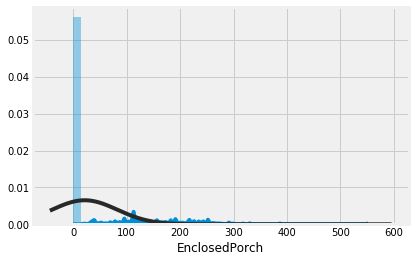

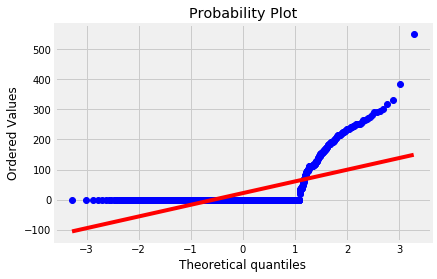

In [71]:
sns.distplot(df_number['EnclosedPorch'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['EnclosedPorch'], plot=plt)

In [72]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['EnclosedPorch'].skew())
print("Kurtosis: %f" % df_number['EnclosedPorch'].kurt())

Skewness: 3.184097
Kurtosis: 11.154875


__Important Note:__ We will not apply logaritm functions in the *EnclosedPorch* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__23) BsmtFullBath__

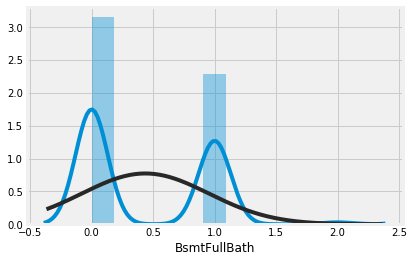

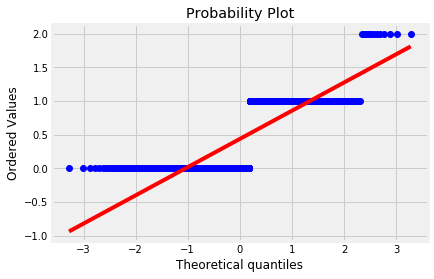

In [73]:
sns.distplot(df_number['BsmtFullBath'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['BsmtFullBath'], plot=plt)

In [74]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['BsmtFullBath'].skew())
print("Kurtosis: %f" % df_number['BsmtFullBath'].kurt())

Skewness: 0.471022
Kurtosis: -1.278006


__Important Note:__ We will not apply logaritm functions in the *BsmtFullBath* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__24) FullBath__

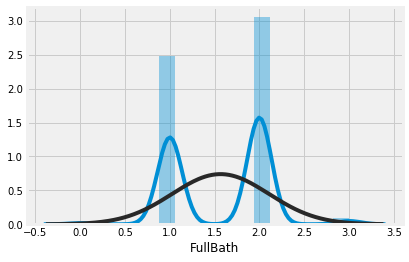

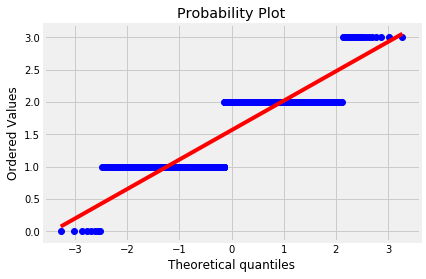

In [75]:
sns.distplot(df_number['FullBath'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['FullBath'], plot=plt)

In [76]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['FullBath'].skew())
print("Kurtosis: %f" % df_number['FullBath'].kurt())

Skewness: -0.060580
Kurtosis: -0.982991


__Important Note:__ We will not apply logaritm functions in the *FullBath* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__25) HalfBath__

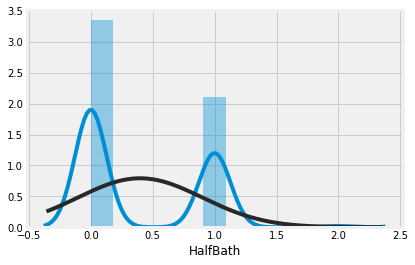

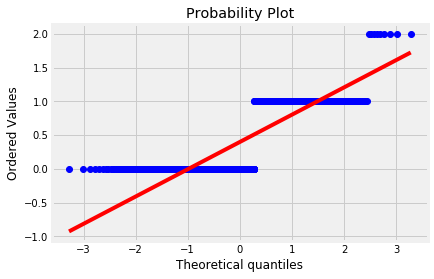

In [77]:
sns.distplot(df_number['HalfBath'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['HalfBath'], plot=plt)

In [78]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['HalfBath'].skew())
print("Kurtosis: %f" % df_number['HalfBath'].kurt())

Skewness: 0.576865
Kurtosis: -1.276247


__Important Note:__ We will not apply logaritm functions in the *HalfBath* variable in order to avoid infinit values!! 

OverflowError: "cannot convert float infinity to integer"

__26) TotRmsAbvGrd__

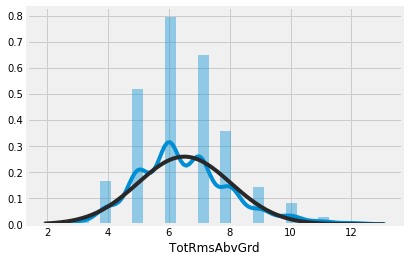

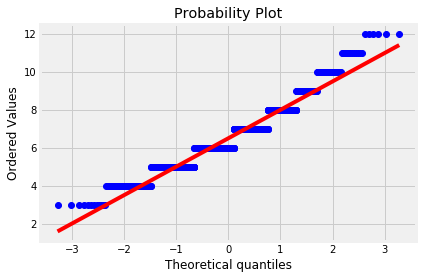

In [79]:
sns.distplot(df_number['TotRmsAbvGrd'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_number['TotRmsAbvGrd'], plot=plt)

In [80]:
#Measures of dispersion =>> Skewness and Kurtosis
print("Skewness: %f" % df_number['TotRmsAbvGrd'].skew())
print("Kurtosis: %f" % df_number['TotRmsAbvGrd'].kurt())

Skewness: 0.607998
Kurtosis: 0.634677


__Important Note:__ We will not apply logaritm functions in the *TotRmsAbvGrd* variable because the Skewness and Kurtosis values are really close to 0 and the final results may not be very reliable! 

__Summary of the variables to which it has been applied logaritm functions:__

* LotFrontage
* LotArea
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* GarageArea

## 4 Checking the results in the Logistics Regression Model

In [81]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression (random_state = 0)
log_regressor.fit(df_number, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

__Important Note:__ The classifier learns the correlation between the df_number and the x_train. 

Now, let's start calculating the $R^2$ (coefficient of determination) regression score function, which determines the quality of the model to replicate the results and the proportion of variation of the results that can be explained by the model.

**Best possible score is 1.0 and it can be negative** (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.

In [82]:
#Compute Score (𝑅2) for the df_number and y_training
print('Training Score: {}'.format(log_regressor.score(df_number, y_train)))
#Compute MSE (Mean Squared Error) for the df_number and y_training
print('Training MSE: {}'.format(np.mean((log_regressor.predict(df_number) - y_train)**2)))

Training Score: 0.5385196374622356
Training MSE: 682335290.2839879


__Comments & Remarks:__ 
We realized that the score of the Logistics Regression worsened after applying logaritm functions in the correction of the distribution of some numerical variables. Therefore, we decided not to use this method to improve model performance, as the results are not as expected. 